<a href="https://colab.research.google.com/github/nocturnal-deviant/nocturnal-deviant/blob/main/poem_classificstion_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re
from nltk.stem import WordNetLemmatizer
df=pd.read_csv('/content/Poem_classification - train_data.csv',encoding='ISO-8859-1')
df1=pd.read_csv('/content/Poem_classification - test_data.csv',encoding='ISO-8859-1')
df

,Genre,Poem
0,Music,Â Â Â Â Â Â Â In the thick brushthey sp...
1,Music,Â Â Storms are generous.Â Â Â Â Â Â Â ...
2,Music,âAfter Ana Mendieta Did you carry around th...
3,Music,for Aja Sherrard at 20The portent may itself ...
4,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
...,...,...
832,Environment,Why make so much of fragmentary blue In here a...
833,Environment,"Woman, I wish I didn't know your name. What co..."
834,Environment,"Yonder to the kiosk, beside the creek, Paddle ..."
835,Environment,You come to fetch me from my work to-nightÂ Wh...


In [93]:
df1

,Genre,Poem
0,Music,A woman walks by the bench Iâm sitting onwit...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldnât..."
4,Music,"I put shells there, along the lip of the road...."
...,...,...
145,Environment,"To pick a tulip from the garden, the red one. ..."
146,Environment,We are as clouds that veil the midnight moon; ...
147,Environment,"When pulled, the spider web took another form...."
148,Environment,Whose woods these are I think I know. His hous...


In [94]:
df.shape

(837, 2)

In [95]:
df1.shape

(150, 2)

In [96]:
print(df.isna().sum())

Genre    0
Poem     0
dtype: int64


In [97]:
print(df1.isna().sum())

Genre    0
Poem     0
dtype: int64


<Axes: xlabel='Genre', ylabel='count'>

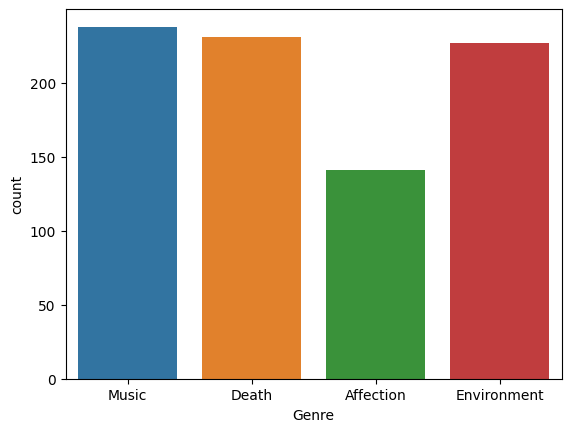

In [98]:
sns.countplot(x='Genre',data=df)

In [99]:
df.value_counts(['Genre'])

Genre      
Music          238
Death          231
Environment    227
Affection      141
dtype: int64

In [100]:
df1['Genre']=df1['Genre'].map({'Music':0,'Death':1,'Environment':2,'Affection':3})
df1

,Genre,Poem
0,0,A woman walks by the bench Iâm sitting onwit...
1,0,"Because I am a boy, the untouchability of beau..."
2,0,"Because today we did not leave this world,We n..."
3,0,"Big Bend has been here, been here. Shouldnât..."
4,0,"I put shells there, along the lip of the road...."
...,...,...
145,2,"To pick a tulip from the garden, the red one. ..."
146,2,We are as clouds that veil the midnight moon; ...
147,2,"When pulled, the spider web took another form...."
148,2,Whose woods these are I think I know. His hous...


In [105]:
df['Genre']=df['Genre'].map({'Music':0,'Death':1,'Environment':2,'Affection':3})
df

,Genre,Poem
0,0,Â Â Â Â Â Â Â In the thick brushthey sp...
1,0,Â Â Storms are generous.Â Â Â Â Â Â Â ...
2,0,âAfter Ana Mendieta Did you carry around th...
3,0,for Aja Sherrard at 20The portent may itself ...
4,0,"for Bob Marley, Bavaria, November 1980 Here i..."
...,...,...
832,2,Why make so much of fragmentary blue In here a...
833,2,"Woman, I wish I didn't know your name. What co..."
834,2,"Yonder to the kiosk, beside the creek, Paddle ..."
835,2,You come to fetch me from my work to-nightÂ Wh...


In [70]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
sen=df.Poem
sen

0      Â  Â  Â  Â  Â  Â  Â  In the thick brushthey sp...
1      Â  Â Storms are generous.Â  Â  Â  Â  Â  Â  Â  ...
2       âAfter Ana Mendieta Did you carry around th...
3       for Aja Sherrard at 20The portent may itself ...
4       for Bob Marley, Bavaria, November 1980 Here i...
                             ...                        
832    Why make so much of fragmentary blue In here a...
833    Woman, I wish I didn't know your name. What co...
834    Yonder to the kiosk, beside the creek, Paddle ...
835    You come to fetch me from my work to-nightÂ Wh...
836    You see them through water and glass, (both li...
Name: Poem, Length: 837, dtype: object

In [72]:
#Tokenizing the input value
from nltk import TweetTokenizer
tk=TweetTokenizer()
sen=sen.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
sen

0      Â Â Â Â Â Â Â In the thick brushthey spend the...
1      Â Â Storms are generous . Â Â Â Â Â Â Â Â Â Â ...
2      â   After Ana Mendieta Did you carry around ...
3      for Aja Sherrard at 20The portent may itself b...
4      for Bob Marley , Bavaria , November 1980 Here ...
                             ...                        
832    Why make so much of fragmentary blue In here a...
833    Woman , I wish I didn't know your name . What ...
834    Yonder to the kiosk , beside the creek , Paddl...
835    You come to fetch me from my work to-nightÂ Wh...
836    You see them through water and glass , ( both ...
Name: Poem, Length: 837, dtype: object

In [73]:
sen=sen.str.replace('[^a-zA-Z0-9]+'," ")
sen

<ipython-input-73-9c162f3e1c13>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sen=sen.str.replace('[^a-zA-Z0-9]+'," ")


0       In the thick brushthey spend the hottest part...
1       Storms are generous Something so easy to surr...
2       After Ana Mendieta Did you carry around the m...
3      for Aja Sherrard at 20The portent may itself b...
4      for Bob Marley Bavaria November 1980 Here is t...
                             ...                        
832    Why make so much of fragmentary blue In here a...
833    Woman I wish I didn t know your name What coul...
834    Yonder to the kiosk beside the creek Paddle th...
835    You come to fetch me from my work to night Whe...
836    You see them through water and glass both liqu...
Name: Poem, Length: 837, dtype: object

In [74]:
#tokenizing the input data and removing all the words which have letters less than or equal to 3
from nltk.tokenize import word_tokenize
sen=sen.apply(lambda x:' '.join([w for w in word_tokenize(x)if len(w)>=3]))
sen

0      the thick brushthey spend the hottest part the...
1      Storms are generous Something easy surrender s...
2      After Ana Mendieta Did you carry around the ma...
3      for Aja Sherrard 20The portent may itself memo...
4      for Bob Marley Bavaria November 1980 Here the ...
                             ...                        
832    Why make much fragmentary blue here and there ...
833    Woman wish didn know your name What could you ...
834    Yonder the kiosk beside the creek Paddle the s...
835    You come fetch from work night When supper the...
836    You see them through water and glass both liqu...
Name: Poem, Length: 837, dtype: object

In [75]:
from IPython.lib.display import join
from nltk.stem import SnowballStemmer
stemming=SnowballStemmer('english')
sen=sen.apply(lambda x:[stemming.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
sen

0      the thick brushthey spend the hottest part the...
1      storm are generous someth easi surrend sit the...
2      after ana mendieta did you carri around the ma...
3      for aja sherrard 20the portent may itself memo...
4      for bob marley bavaria novemb 1980 here the br...
                             ...                        
832    whi make much fragmentari blue here and there ...
833    woman wish didn know your name what could you ...
834    yonder the kiosk besid the creek paddl the swi...
835    you come fetch from work night when supper the...
836    you see them through water and glass both liqu...
Name: Poem, Length: 837, dtype: object

In [76]:
#removing all the stopwords such as-- as,is,the...etc
from nltk.corpus import stopwords
stop=stopwords.words('english')
sen=sen.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
sen

0      thick brushthey spend hottest part day soak ho...
1      storm generous someth easi surrend sit window ...
2      ana mendieta carri around matin star hold fore...
3      aja sherrard 20the portent may memori wallac s...
4      bob marley bavaria novemb 1980 brilliant morn ...
                             ...                        
832    whi make much fragmentari blue bird butterfli ...
833    woman wish know name could silenc hous front y...
834    yonder kiosk besid creek paddl swift caqu thou...
835    come fetch work night supper tabl see leav bur...
836    see water glass liquid air plenti liquid water...
Name: Poem, Length: 837, dtype: object

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data_vec=vec.fit_transform(sen)

In [78]:
print(train_data_vec)

  (0, 3873)	0.2994459006689854
  (0, 493)	0.2994459006689854
  (0, 2694)	0.2994459006689854
  (0, 4424)	0.28219425370518464
  (0, 6230)	0.16248982666785194
  (0, 3648)	0.20147597838939213
  (0, 5893)	0.25270236842615806
  (0, 2726)	0.2994459006689854
  (0, 5115)	0.2699540153899589
  (0, 1426)	0.13843696968344407
  (0, 4002)	0.21980484229864158
  (0, 2740)	0.28219425370518464
  (0, 5215)	0.2604597489474452
  (0, 769)	0.2994459006689854
  (0, 5681)	0.23096786366841868
  (1, 659)	0.3479211203411134
  (1, 2292)	0.2835645327558345
  (1, 5321)	0.2835645327558345
  (1, 6357)	0.2498597641428726
  (1, 5007)	0.2904642500887525
  (1, 5505)	0.3885256062869933
  (1, 1726)	0.3241690187017144
  (1, 5149)	0.2745344028092085
  (1, 2314)	0.3885256062869933
  (1, 5369)	0.2982865044486074
  :	:
  (835, 4797)	0.1185087435950478
  (835, 1154)	0.11456013542436623
  (835, 3758)	0.10980247665635538
  (836, 3284)	0.39134677510593663
  (836, 6148)	0.19567338755296831
  (836, 2890)	0.19567338755296831
  (836, 371

In [79]:
train_data_vec.shape

(837, 6536)

In [106]:
y=df['Genre'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [107]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train_data_vec,y,test_size=0.30,random_state=42)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier()

In [109]:
from sklearn.svm import SVC
model=SVC()
model.fit(xtrain,ytrain)

SVC()

In [110]:
ypred=classifier.predict(xtest)
ypred

array([0, 1, 0, 1, 2, 3, 1, 1, 3, 0, 1, 1, 3, 1, 2, 3, 2, 0, 1, 0, 2, 0,
       1, 3, 1, 0, 0, 2, 0, 0, 0, 3, 2, 1, 0, 2, 0, 3, 2, 0, 0, 2, 0, 1,
       1, 2, 0, 1, 3, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 1,
       0, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 0, 1, 3, 2, 0, 0, 1, 0, 2, 1, 3, 1, 1, 1, 2, 3, 3, 1, 1, 0, 0,
       1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 3, 3, 0,
       0, 3, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 3,
       0, 0, 2, 1, 2, 0, 3, 2, 2, 3, 0, 3, 2, 0, 2, 3, 1, 0, 0, 2, 1, 1,
       2, 2, 1, 2, 0, 1, 0, 1, 0, 3, 1, 2, 0, 1, 2, 2, 3, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 3, 1, 2, 0, 0, 3, 2, 0, 1,
       1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 3, 2, 1, 2, 0, 1,
       0, 1, 0, 0, 0, 1, 3, 0, 0, 1])

In [111]:
y_pred=model.predict(xtest)
y_pred

array([0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0,
       1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       1, 2, 0, 0, 1, 3, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 3, 0,
       0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0,
       0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 0, 0, 2, 1, 1,
       0, 2, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2,
       2, 0, 0, 0, 3, 1, 3, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 2, 2, 0, 2])

In [112]:
from sklearn.metrics import classification_report,accuracy_score
print('Accuracy score',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

Accuracy score 0.3412698412698413
              precision    recall  f1-score   support

           0       0.39      0.42      0.41        74
           1       0.29      0.33      0.31        69
           2       0.42      0.41      0.41        69
           3       0.15      0.10      0.12        40

    accuracy                           0.34       252
   macro avg       0.31      0.31      0.31       252
weighted avg       0.33      0.34      0.34       252



In [113]:
print(accuracy_score(ytest,y_pred))

0.4246031746031746
